In [1]:
# Importando as bibliotecas necess√°rias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# URLs das tabelas
url_demo = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT'
url_bmi = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.XPT'

In [3]:
# Carregando as tabelas usando pandas
demographic = pd.read_sas(url_demo)
body_measure = pd.read_sas(url_bmi)

In [4]:
# Merge das tabelas utilizando o atributo 'SEQN' como chave
df = pd.merge(demographic[['SEQN', 'RIDAGEYR']], body_measure[['SEQN', 'BMXBMI']], on='SEQN')
df = pd.merge(df, body_measure[['SEQN', 'BMXWAIST']], on='SEQN')

In [5]:
# Filtrando os dados para incluir apenas indiv√≠duos entre 20 e 60 anos
df_filtered = df[(df['RIDAGEYR'] >= 20) & (df['RIDAGEYR'] <= 60)]

In [6]:
# Remover dados faltantes
df_filtered = df_filtered.dropna(subset=['BMXBMI', 'BMXWAIST'])

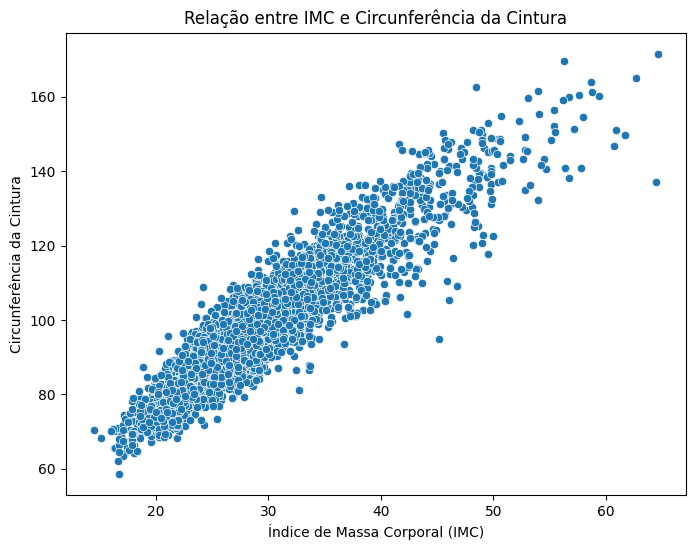

In [7]:
# Visualizar a rela√ß√£o entre IMC e PAS
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMXBMI', y='BMXWAIST', data=df_filtered)
plt.title('Rela√ß√£o entre IMC e Circunfer√™ncia da Cintura')
plt.xlabel('√çndice de Massa Corporal (IMC)')
plt.ylabel('Circunfer√™ncia da Cintura')
plt.show()

In [8]:
# Definir as vari√°veis dependente (X) e independente (y)
X = df_filtered[['BMXBMI']]
y = df_filtered['BMXWAIST']

In [9]:
# Criar e treinar o modelo de regress√£o linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
# Fazer predi√ß√µes
y_pred = model.predict(X)

In [11]:
# Avaliar o modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
coef = model.coef_[0]

print(f'Erro quadr√°tico m√©dio (MSE): {mse:.2f}')
print(f'Coeficiente da regress√£o: {coef:.2f}')
print(f'Coeficiente de determina√ß√£o (R¬≤): {r2:.2f}')


Erro quadr√°tico m√©dio (MSE): 42.62
Coeficiente da regress√£o: 2.20
Coeficiente de determina√ß√£o (R¬≤): 0.86


O valor de $ùëÖ^2$ (coeficiente de determina√ß√£o) indica a propor√ß√£o da varia√ß√£o na PAS explicada pelo IMC.

- Se o valor de $R^2$ for pr√≥ximo de 1, significa que uma grande parte da varia√ß√£o da PAS √© explicada pelo IMC, sugerindo uma forte depend√™ncia.

- Se o valor de $R^2$ for pr√≥ximo de 0, significa que o IMC explica muito pouco da varia√ß√£o da PAS, sugerindo independ√™ncia ou uma rela√ß√£o fraca.

In [14]:
# Usando o modelo para prever a circunfer√™ncia da cintura para um IMC = 25
imc_25 = pd.DataFrame({'BMXBMI': [25]})  # Cria um DataFrame com o nome da coluna
waist_pred_25 = model.predict(imc_25)
print(f'Previs√£o da circunfer√™ncia da cintura para IMC = 25: {waist_pred_25[0]:.2f} cm')

Previs√£o da circunfer√™ncia da cintura para IMC = 25: 89.00 cm
